Pierre Navaro - [Institut de Recherche Mathématique de Rennes](https://irmar.univ-rennes1.fr) - [CNRS](http://www.cnrs.fr/)

![Dask logo](https://www.continuum.io/sites/default/files/dask_stacked.png)

# References
* [Dask website](https://dask.pydata.org/)
* [Dask Tutorial](https://github.com/dask/dask-tutorial)
* [Matrix multiplication by Pantelis Isaiah](https://pantelisaiah.wordpress.com/portfolio/matrix-multiplication/)
* [Parallelizing Scientific Python with Dask | SciPy 2017 Tutorial | James Crist](https://youtu.be/mbfsog3e5DA)

# Dask Features

- process data that doesn't fit into memory by breaking it into blocks and specifying task chains
- parallelize execution of tasks across cores and even nodes of a cluster
- move computation to the data rather than the other way around, to minimize communication overheads



In [1]:
from time import sleep

def inc(x):
    sleep(1)
    return x + 1

def add(x, y):
    sleep(1)
    return x + y

In [2]:
%%time
x = inc(1)
y = inc(2)
z = add(x, y)

CPU times: user 811 µs, sys: 1 ms, total: 1.81 ms
Wall time: 3.88 s


# Parallelize with dask.delayed

- Functions wrapped by `dask.delayed` don't run immediately, but instead put those functions and arguments into a task graph. 
- The result is computed separately by calling the `.compute()` method.

In [3]:
from dask import delayed

In [4]:
%%time
x = delayed(inc)(1)
y = delayed(inc)(2)
z = delayed(add)(x, y)

CPU times: user 332 µs, sys: 63 µs, total: 395 µs
Wall time: 356 µs


In [5]:
%%time
z.compute()

CPU times: user 5.8 ms, sys: 2.65 ms, total: 8.44 ms
Wall time: 2.01 s


5

# Dask graph

- Contains description of the calculations necessary to produce the result. 

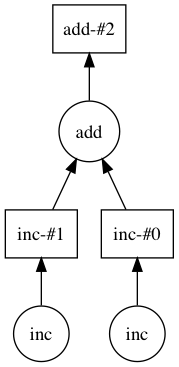

In [6]:
z.visualize()

# Parallelize a loop


In [7]:
data = [1, 2, 3, 4, 5, 6, 7, 8]

In [8]:
%%time

results = []
for x in data:
    y = inc(x)
    results.append(y)
    
total = sum(results)

CPU times: user 8.41 ms, sys: 2.71 ms, total: 11.1 ms
Wall time: 8.02 s


<button data-toggle="collapse" data-target="#sol1" class='btn btn-primary'>Solution</button>
<div id="sol1" class="collapse">
```python
%%time
results = []
for x in data:
    y = delayed(inc)(x)
    results.append(y)

total = delayed(sum)(results)
print(total)   # Let's see what type of thing total is
total = total.compute()
print(total)   # After it is computed...
```

In [9]:
%%time
results = []
for x in data:
    y = delayed(inc)(x)
    results.append(y)

total = delayed(sum)(results)

CPU times: user 1.49 ms, sys: 1.05 ms, total: 2.54 ms
Wall time: 1.73 ms


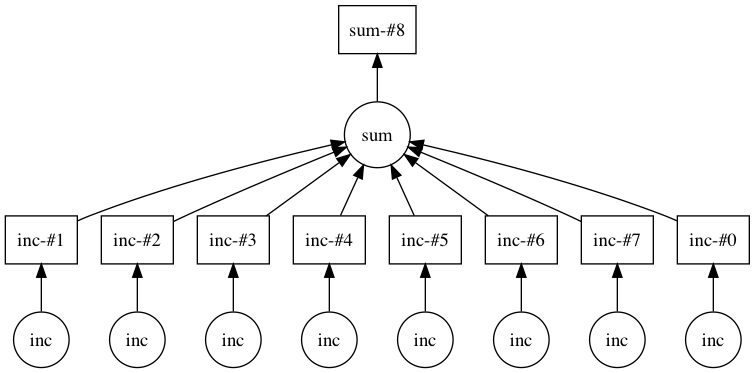

In [10]:
total.visualize()

In [11]:
%time total.compute()

CPU times: user 3.64 ms, sys: 2.08 ms, total: 5.73 ms
Wall time: 1.01 s


44

# Control flow
-  Delay only some functions, running a few of them immediately.

In [12]:
def double(x):
    sleep(1)
    return 2 * x

def is_even(x):
    return not x % 2

data = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [13]:
%%time
results = []
for x in data:
    if is_even(x):
        y = double(x)
    else:
        y = inc(x)
    results.append(y)
    
total = sum(results)
print(total)

90
CPU times: user 10.2 ms, sys: 2.51 ms, total: 12.7 ms
Wall time: 10 s


In [14]:
%%time
results = []
for x in data:
    if is_even(x):
        y = delayed(double)(x)
    else:
        y = delayed(inc)(x)
    results.append(y)
    
total = delayed(sum)(results)
print(total)

Delayed('sum-16fb17f2-a3d8-4fcc-b82e-91fb2e0c4d7e')
CPU times: user 1.01 ms, sys: 640 µs, total: 1.65 ms
Wall time: 1.15 ms


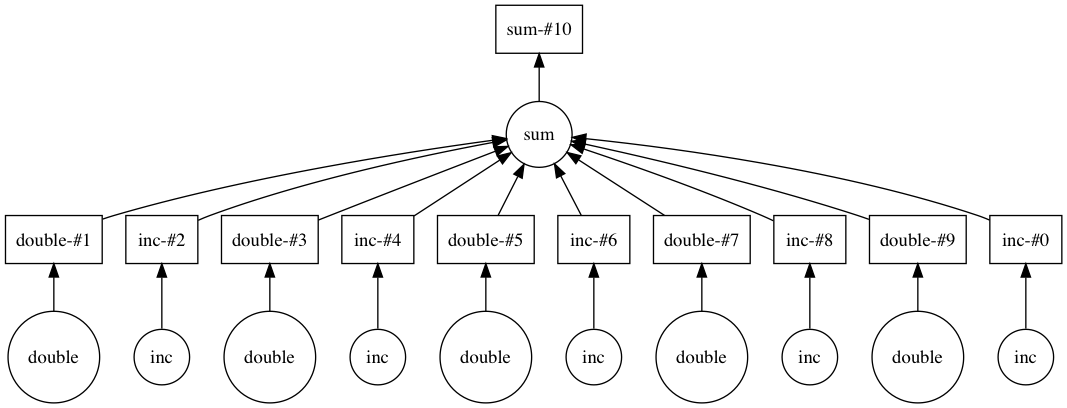

In [15]:
total.visualize()

In [16]:
total.compute()

90

In [17]:
import os, tarfile
def extract_flight():
    flightdir = os.path.join('data', 'nycflights')
    if not os.path.exists(flightdir):
        print("Extracting flight data")
        tar_path = os.path.join('data', 'nycflights.tar.gz')
        print(tar_path)
        with tarfile.open(tar_path, mode='r:gz') as flights:
            flights.extractall('data/')

extract_flight()

In [18]:
%ls data/nycflights/

1990.csv  1992.csv  1994.csv  1996.csv  1998.csv
1991.csv  1993.csv  1995.csv  1997.csv  1999.csv


In [19]:
import pandas as pd
df = pd.read_csv(os.path.join('data','nycflights','1990.csv'))
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
0,1990,1,1,1,1621.0,1540,1747.0,1701,US,33,...,NaN,46.0,41.0,EWR,PIT,319.0,NaN,NaN,0,0
1,1990,1,2,2,1547.0,1540,1700.0,1701,US,33,...,NaN,-1.0,7.0,EWR,PIT,319.0,NaN,NaN,0,0
2,1990,1,3,3,1546.0,1540,1710.0,1701,US,33,...,NaN,9.0,6.0,EWR,PIT,319.0,NaN,NaN,0,0
3,1990,1,4,4,1542.0,1540,1710.0,1701,US,33,...,NaN,9.0,2.0,EWR,PIT,319.0,NaN,NaN,0,0
4,1990,1,5,5,1549.0,1540,1706.0,1701,US,33,...,NaN,5.0,9.0,EWR,PIT,319.0,NaN,NaN,0,0


In [20]:
df.groupby('Origin').DepDelay.mean()

Origin
EWR     9.168411
JFK    11.857274
LGA     8.560045
Name: DepDelay, dtype: float64

## Compute the mean of departure delay for all files combined.

### Sequential code

## dask.delayed

1.  Methods and attribute access on delayed objects work automatically, so if you have a delayed object you can perform normal arithmetic, slicing, and method calls on it and it will produce the correct delayed calls.

    ```python
    x = delayed(np.arange)(10)
    y = (x + 1)[::2].sum()  # everything here was delayed
    ```
2.  Calling the `.compute()` method works well when you have a single output.  When you have multiple outputs you might want to use the `dask.compute` function:

    ```python
    >>> x = delayed(np.arange)(10)
    >>> y = x ** 2
    >>> min, max = compute(y.min(), y.max())
    (0, 81)
    ```
    This way Dask can share the intermediate values (like `y = x**2`)
   

In [21]:
from glob import glob

filenames = sorted(glob(os.path.join('data', 'nycflights', '*.csv')))

In [22]:
from dask import compute

In [23]:
sums = []
counts = []
for f in filenames:
    
    df = (delayed)(pd.read_csv)(f)     # Read in file   
    by_origin = df.groupby('Origin')   # Groupby origin airport
    total = by_origin.DepDelay.sum()   # Sum of all departure delays by origin
    count = by_origin.DepDelay.count() # Number of flights by origin
    sums.append(total)                 # Save the intermediates
    counts.append(count)

# Combine intermediates to get total mean-delay-per-origin
total_delays = delayed(sum)(sums)
n_flights = delayed(sum)(counts)
mean = total_delays / n_flights

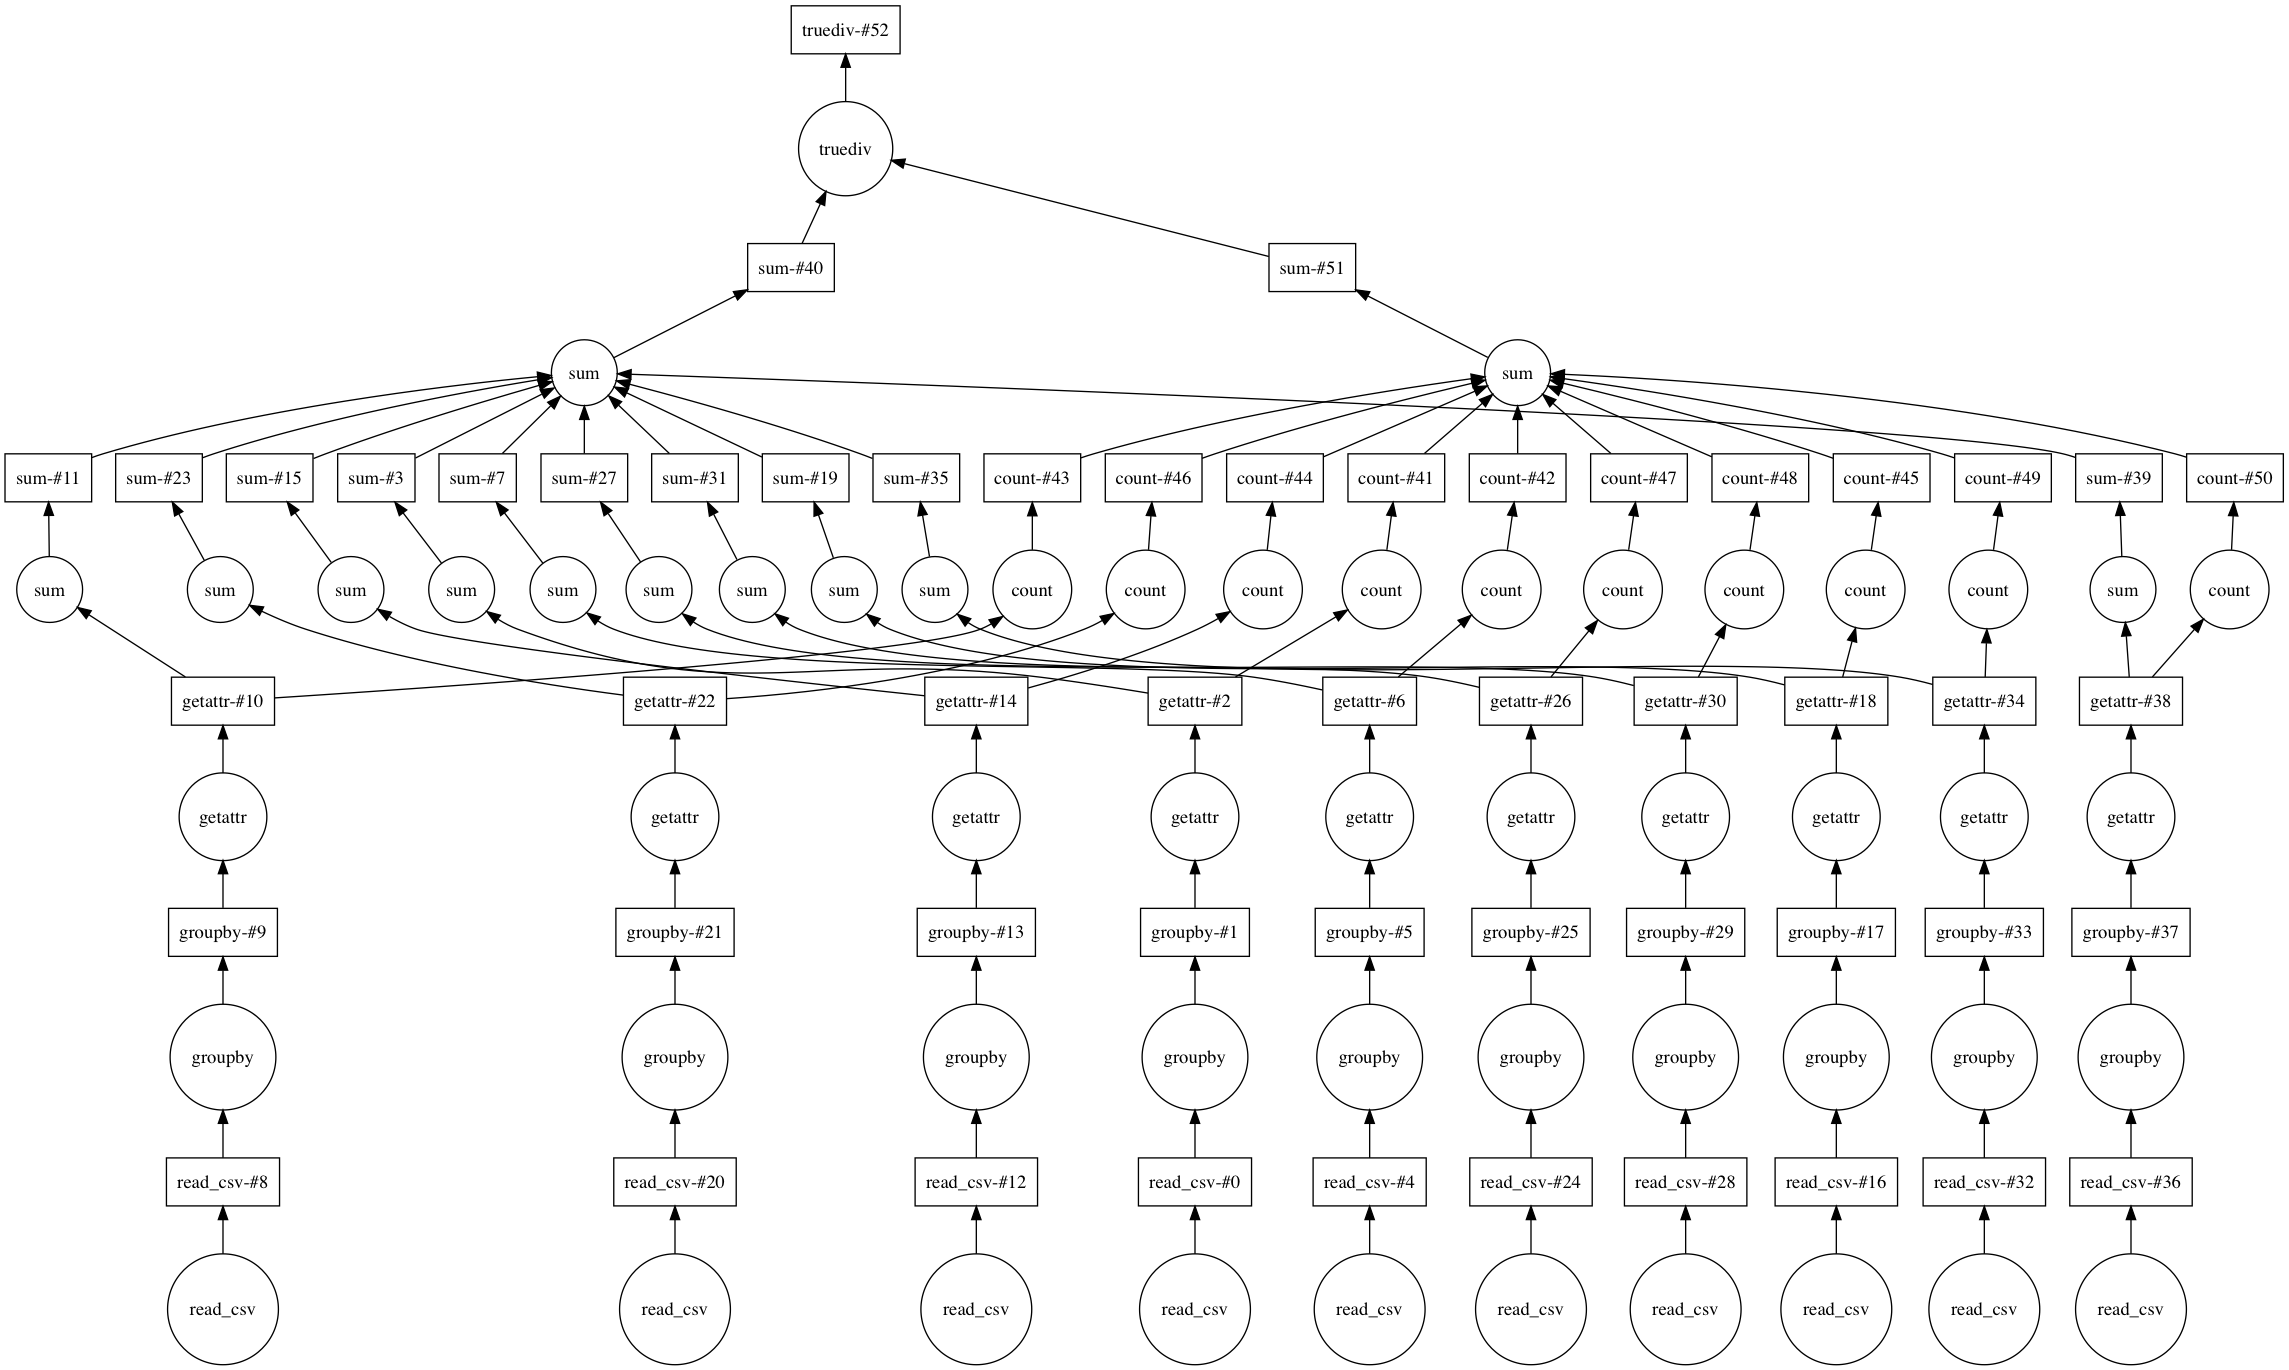

In [24]:
mean.visualize()

In [25]:
%time mean.compute()

CPU times: user 9.31 s, sys: 1.17 s, total: 10.5 s
Wall time: 2.63 s


Origin
EWR    10.295469
JFK    10.351299
LGA     7.431142
Name: DepDelay, dtype: float64

In [26]:
import pandas as pd
pd.set_option("max.rows", 10)

# Dask DataFrames

http://dask.pydata.org/en/latest/dataframe.html

- Dask dataframes look like Pandas dataframes but they run on the same infrastructure that powers `dask.delayed`.
- The `dask.dataframe` module implements a blocked parallel `DataFrame` object that mimics a large subset of the Pandas `DataFrame`. 
- One dask `DataFrame` is comprised of many in-memory pandas `DataFrames` separated along the index. 



In [27]:
import dask
import dask.dataframe as dd

df = dd.read_csv(filenames,
                 parse_dates={'Date': [0, 1, 2]})

In [28]:
df

,Date,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
npartitions=10,,,,,,,,,,,,,,,,,,,,,
None,datetime64[ns],int64,float64,int64,float64,int64,object,int64,float64,float64,int64,float64,float64,float64,object,object,float64,float64,float64,int64,int64
None,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
None,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
None,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [29]:
df.head()

,Date,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,...,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
0,1990-01-01,1,1621.0,1540,1747.0,1701,US,33,NaN,86.0,...,NaN,46.0,41.0,EWR,PIT,319.0,NaN,NaN,0,0
1,1990-01-02,2,1547.0,1540,1700.0,1701,US,33,NaN,73.0,...,NaN,-1.0,7.0,EWR,PIT,319.0,NaN,NaN,0,0
2,1990-01-03,3,1546.0,1540,1710.0,1701,US,33,NaN,84.0,...,NaN,9.0,6.0,EWR,PIT,319.0,NaN,NaN,0,0
3,1990-01-04,4,1542.0,1540,1710.0,1701,US,33,NaN,88.0,...,NaN,9.0,2.0,EWR,PIT,319.0,NaN,NaN,0,0
4,1990-01-05,5,1549.0,1540,1706.0,1701,US,33,NaN,77.0,...,NaN,5.0,9.0,EWR,PIT,319.0,NaN,NaN,0,0


`df.tail()` is not possible because `dask.dataframe.read_csv` only reads in a sample from the beginning of the file (or first file if using a glob). These inferred datatypes are then enforced when reading all partitions.

The first n rows have no value for CRSElapsedTime (which pandas infers as a float), and later on turn out to be strings (object dtype).

We need to specify dtypes directly using the dtype keyword. 

In [30]:
df = dd.read_csv(filenames,
                 parse_dates={'Date': [0, 1, 2]},
                 dtype={'TailNum': str,
                        'CRSElapsedTime': float,
                        'Cancelled': bool})

In [31]:
df.tail()

,Date,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,...,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
269176,1999-12-27,1,1645.0,1645,1830.0,1901,UA,1753,N516UA,225.0,...,205.0,-31.0,0.0,LGA,DEN,1619.0,7.0,13.0,False,0
269177,1999-12-28,2,1726.0,1645,1928.0,1901,UA,1753,N504UA,242.0,...,214.0,27.0,41.0,LGA,DEN,1619.0,5.0,23.0,False,0
269178,1999-12-29,3,1646.0,1645,1846.0,1901,UA,1753,N592UA,240.0,...,220.0,-15.0,1.0,LGA,DEN,1619.0,5.0,15.0,False,0
269179,1999-12-30,4,1651.0,1645,1908.0,1901,UA,1753,N575UA,257.0,...,233.0,7.0,6.0,LGA,DEN,1619.0,5.0,19.0,False,0
269180,1999-12-31,5,1642.0,1645,1851.0,1901,UA,1753,N539UA,249.0,...,232.0,-10.0,-3.0,LGA,DEN,1619.0,6.0,11.0,False,0


For every function on df:
- Dask investigated the input path and found that there are ten matching files.
- A set of jobs was intelligently created for each chunk - one per original CSV file in this case.
- Each file was loaded into a pandas dataframe, had len() applied to it.
- The subtotals were combined to give you the final grant total.
- Some pandas functions are not avalaible in dask (shape,...)

In [32]:
len(df)  # len triggers immediate computation
         # is equivalent to df.size().compute()

2611892

## Computations with `dask.dataframe`

We can now use the pandas syntax on our dask object.  We need to call `.compute()`.


In [33]:
%time df.DepDelay.max().compute()

CPU times: user 12.8 s, sys: 1.45 s, total: 14.3 s
Wall time: 6.75 s


1435.0

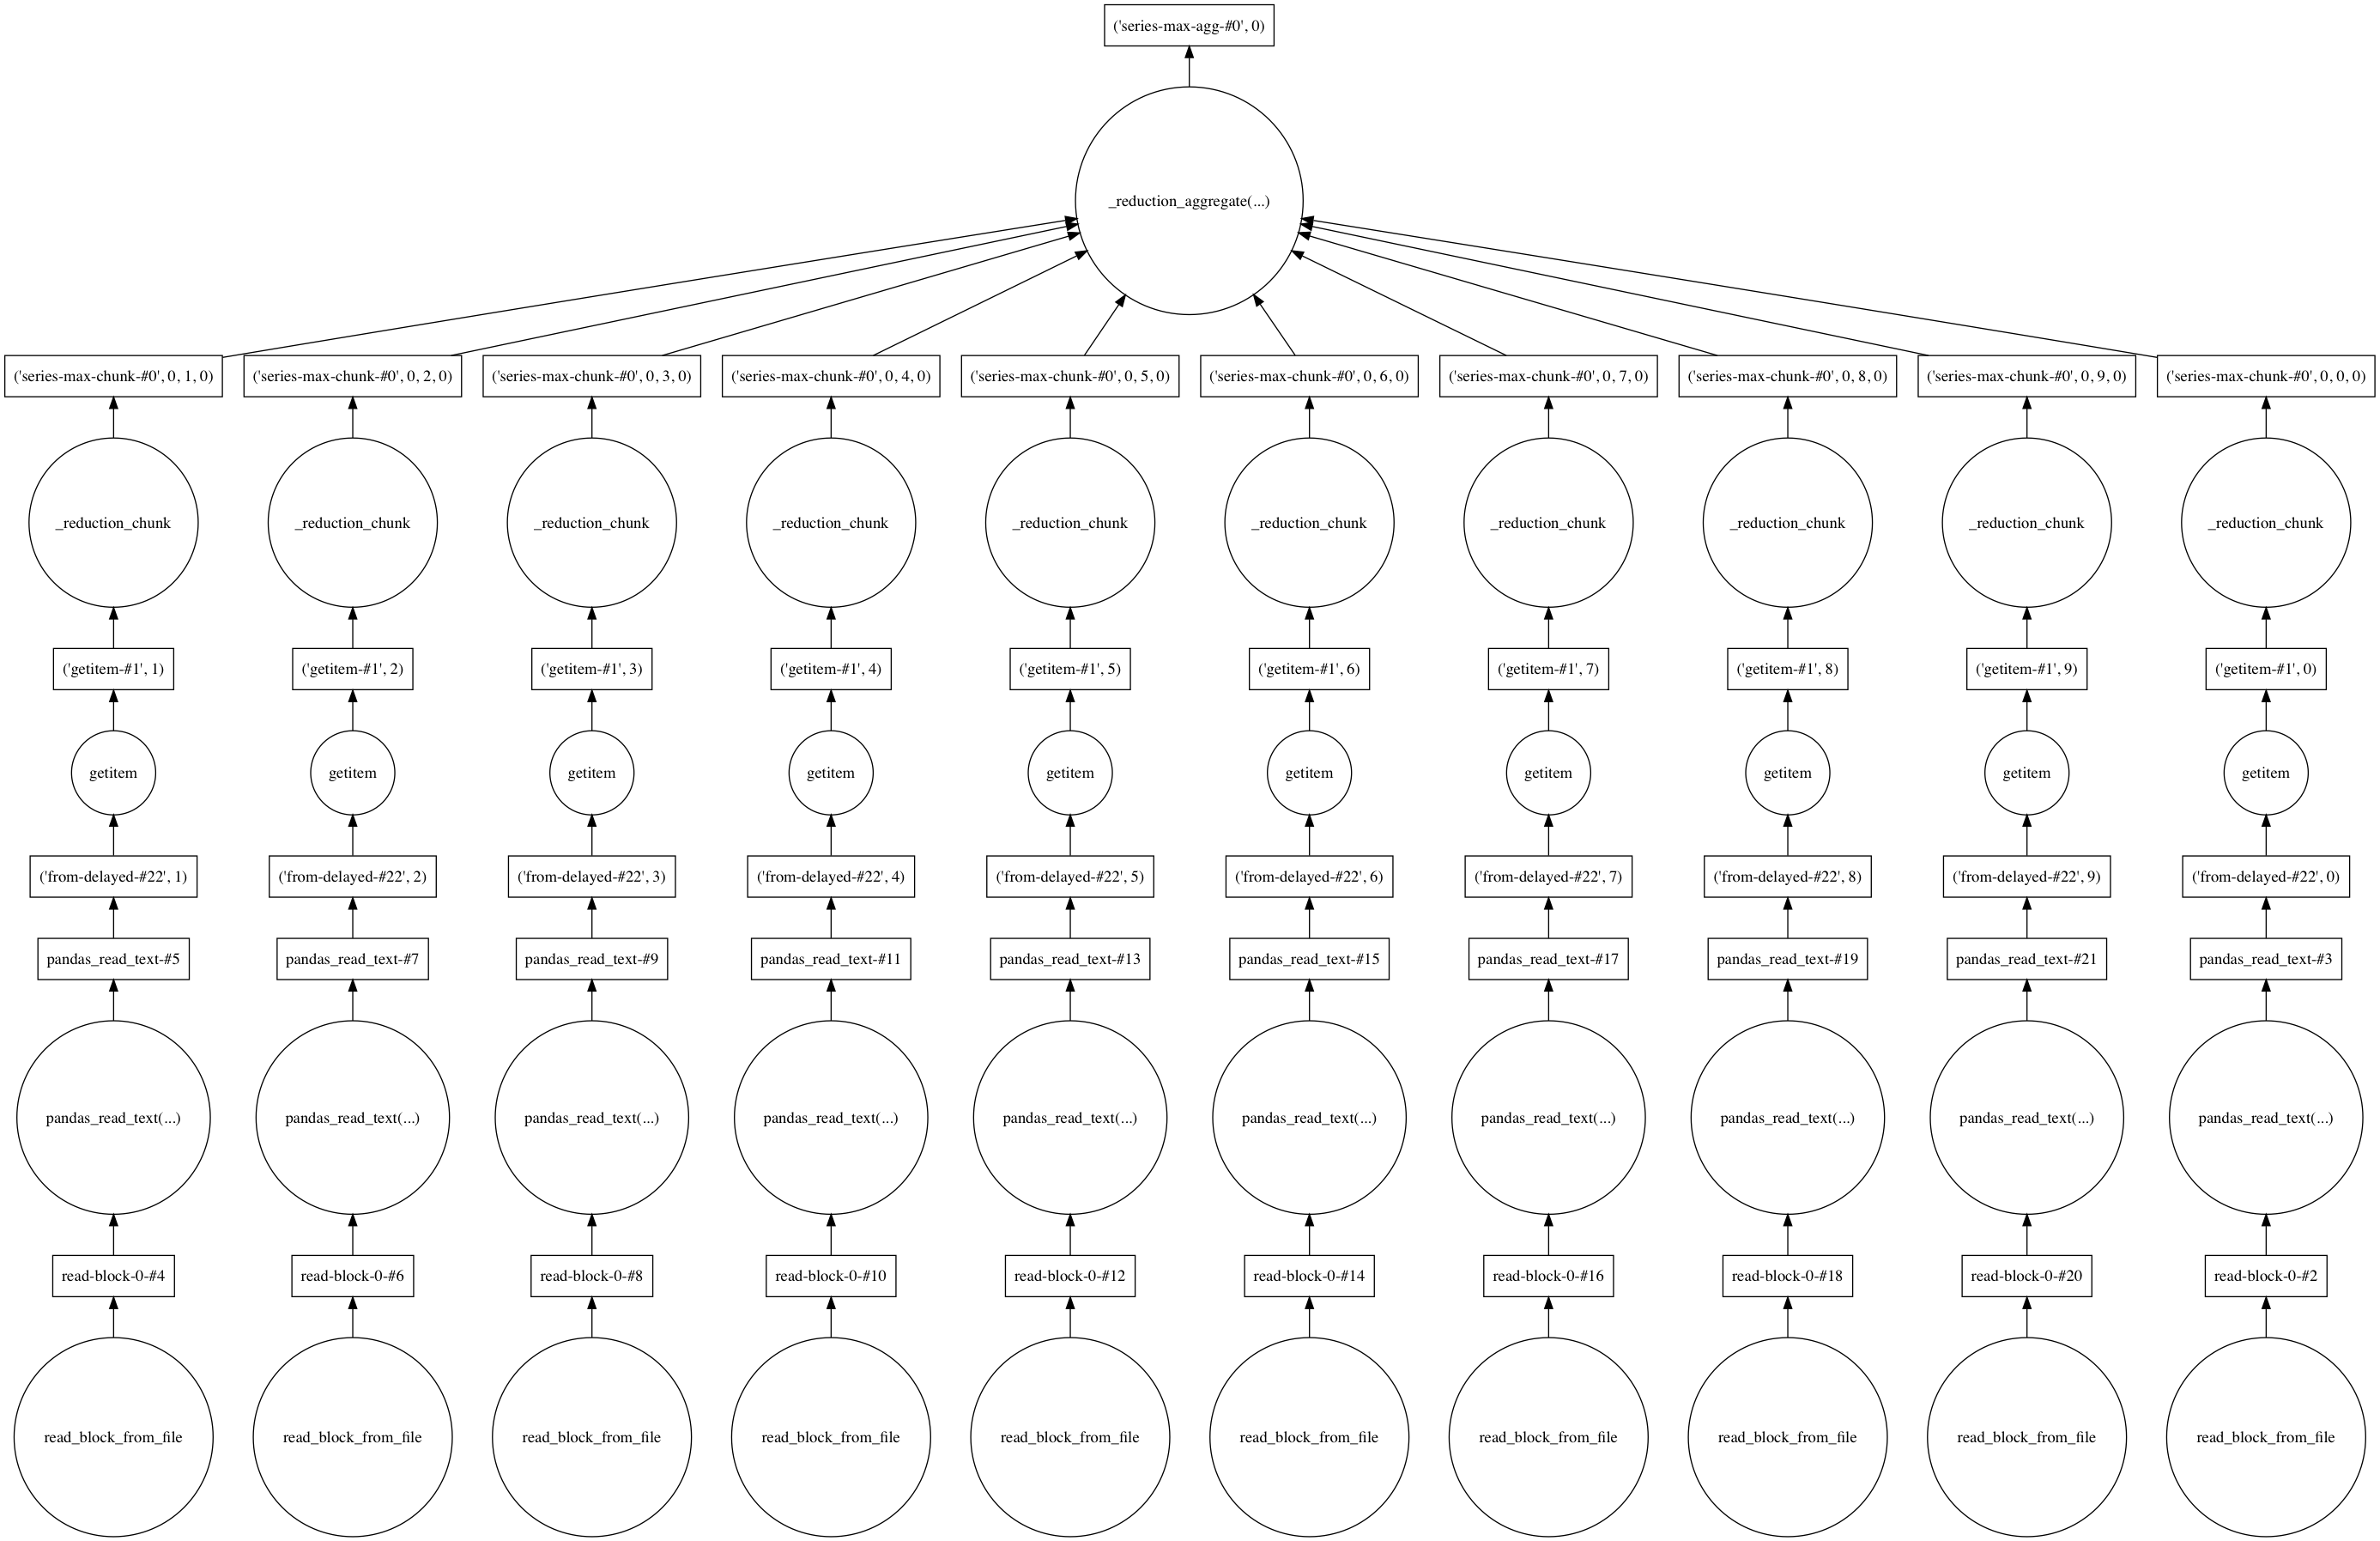

In [34]:
df.DepDelay.max().visualize()

## Pandas operations using Dask Dataframe

In [35]:
df.DepDelay.mean().compute()

9.2066025413219652

In [36]:
%time len(df[df.DepDelay < 0]) # early departure times number

CPU times: user 13 s, sys: 1.62 s, total: 14.7 s
Wall time: 7.1 s


840942

In [37]:
%time len(df[df.DepDelay > 0]) # late departure times number

CPU times: user 13.5 s, sys: 1.65 s, total: 15.1 s
Wall time: 7.29 s


1187146

In [38]:
%%time
import dask

early = df[df.DepDelay < 0].size
late = df[df.DepDelay > 0].size

early_res, late_res = dask.compute(early, late)

CPU times: user 13.4 s, sys: 1.66 s, total: 15 s
Wall time: 7.4 s


# Divisions and the Index

- Dask is a group of dataframes separated along the index by value.
- The `.divisions` attribute shows how your dataset is partitioned.
- Simple data sources like CSV files aren't intelligently indexed by default.  In these cases the values for `.divisions` will be `None.`

In [39]:
df = dd.read_csv(filenames,
                 dtype={'TailNum': str,
                        'CRSElapsedTime': float,
                        'Cancelled': bool})
df.divisions

(None, None, None, None, None, None, None, None, None, None, None)

In [40]:
df2 = df.set_index('Year') # set_index triggers immediate computation.
df2.divisions  # dask divide data along new index and create new divisions.

(1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 1999)

In [41]:
df2.npartitions

10

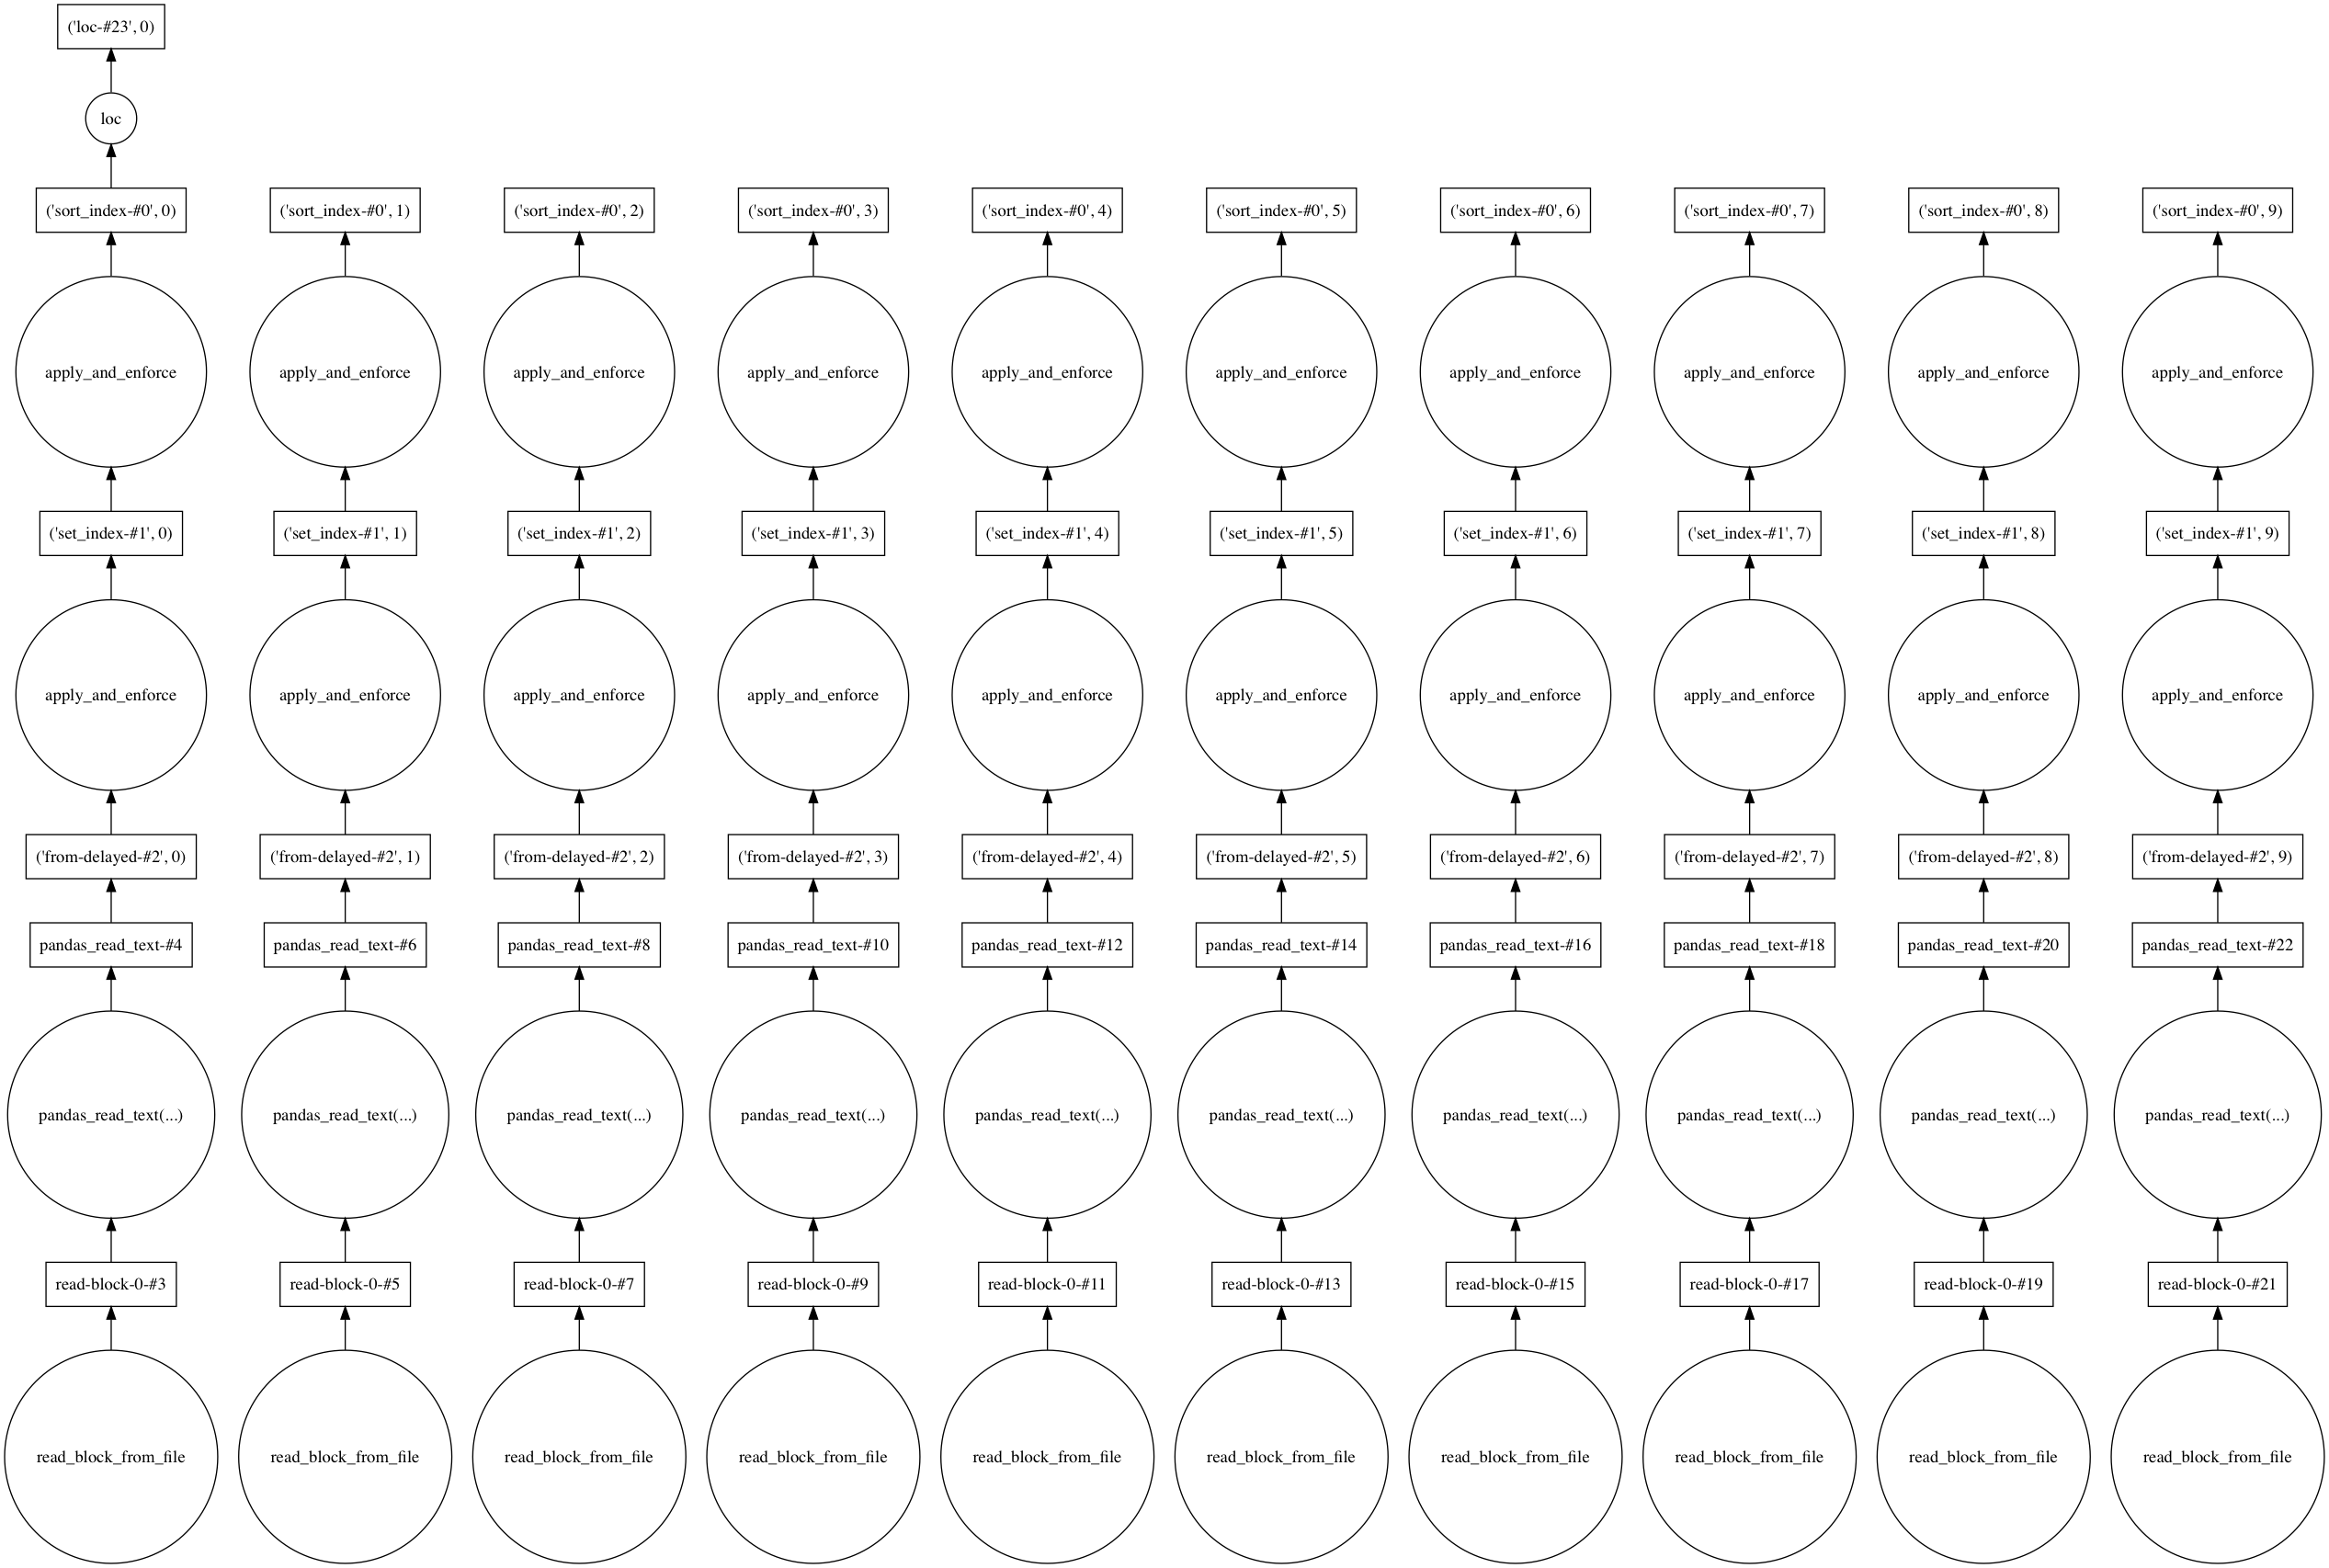

In [42]:
df2.loc[1990].visualize()

In [43]:
df2.loc[1990].compute()

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,...,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
Year,,,,,,,,,,,,,,,,,,,,,
1990,1,1,1,1621.0,1540,1747.0,1701,US,33,NaN,...,NaN,46.0,41.0,EWR,PIT,319.0,NaN,NaN,False,0
1990,1,2,2,1547.0,1540,1700.0,1701,US,33,NaN,...,NaN,-1.0,7.0,EWR,PIT,319.0,NaN,NaN,False,0
1990,1,3,3,1546.0,1540,1710.0,1701,US,33,NaN,...,NaN,9.0,6.0,EWR,PIT,319.0,NaN,NaN,False,0
1990,1,4,4,1542.0,1540,1710.0,1701,US,33,NaN,...,NaN,9.0,2.0,EWR,PIT,319.0,NaN,NaN,False,0
1990,1,5,5,1549.0,1540,1706.0,1701,US,33,NaN,...,NaN,5.0,9.0,EWR,PIT,319.0,NaN,NaN,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1990,12,27,4,1645.0,1535,2001.0,1759,DL,223,NaN,...,NaN,122.0,70.0,LGA,ATL,761.0,NaN,NaN,False,0
1990,12,28,5,1934.0,1535,2205.0,1759,DL,223,NaN,...,NaN,246.0,239.0,LGA,ATL,761.0,NaN,NaN,False,0
1990,12,29,6,1557.0,1535,1931.0,1759,DL,223,NaN,...,NaN,92.0,22.0,LGA,ATL,761.0,NaN,NaN,False,0


- non-cancelled flights from each airport
- average departure delay from each airport
- day of the week with the worst average departure delay

In [44]:
df[~df.Cancelled].groupby(by="Origin").Origin.count().compute()

Origin
EWR    1139451
JFK     427243
LGA     974267
Name: Origin, dtype: int64

In [45]:
df.groupby('Origin')['DepDelay'].mean().compute()

Origin
EWR    10.295469
JFK    10.351299
LGA     7.431142
Name: DepDelay, dtype: float64

In [46]:
df.groupby(by='DayOfWeek')['DepDelay'].mean().compute().argmax()

5

## Sharing Intermediate Results

When computing all of the above, we sometimes did the same operation more than once. For most operations, `dask.dataframe` hashes the arguments, allowing duplicate computations to be shared, and only computed once.

For example, lets compute the mean and standard deviation for departure delay of all non-cancelled flights:

In [48]:
non_cancelled = df[~df.Cancelled]
mean_delay = non_cancelled.DepDelay.mean()
std_delay = non_cancelled.DepDelay.std()

In [50]:
%%time
mean_delay_res = mean_delay.compute()
std_delay_res = std_delay.compute()

CPU times: user 19.7 s, sys: 3.45 s, total: 23.2 s
Wall time: 7.17 s


In [52]:
%%time
mean_delay_res, std_delay_res = dask.compute(mean_delay, std_delay)

CPU times: user 9.86 s, sys: 1.78 s, total: 11.6 s
Wall time: 3.55 s


### Merged task graphs

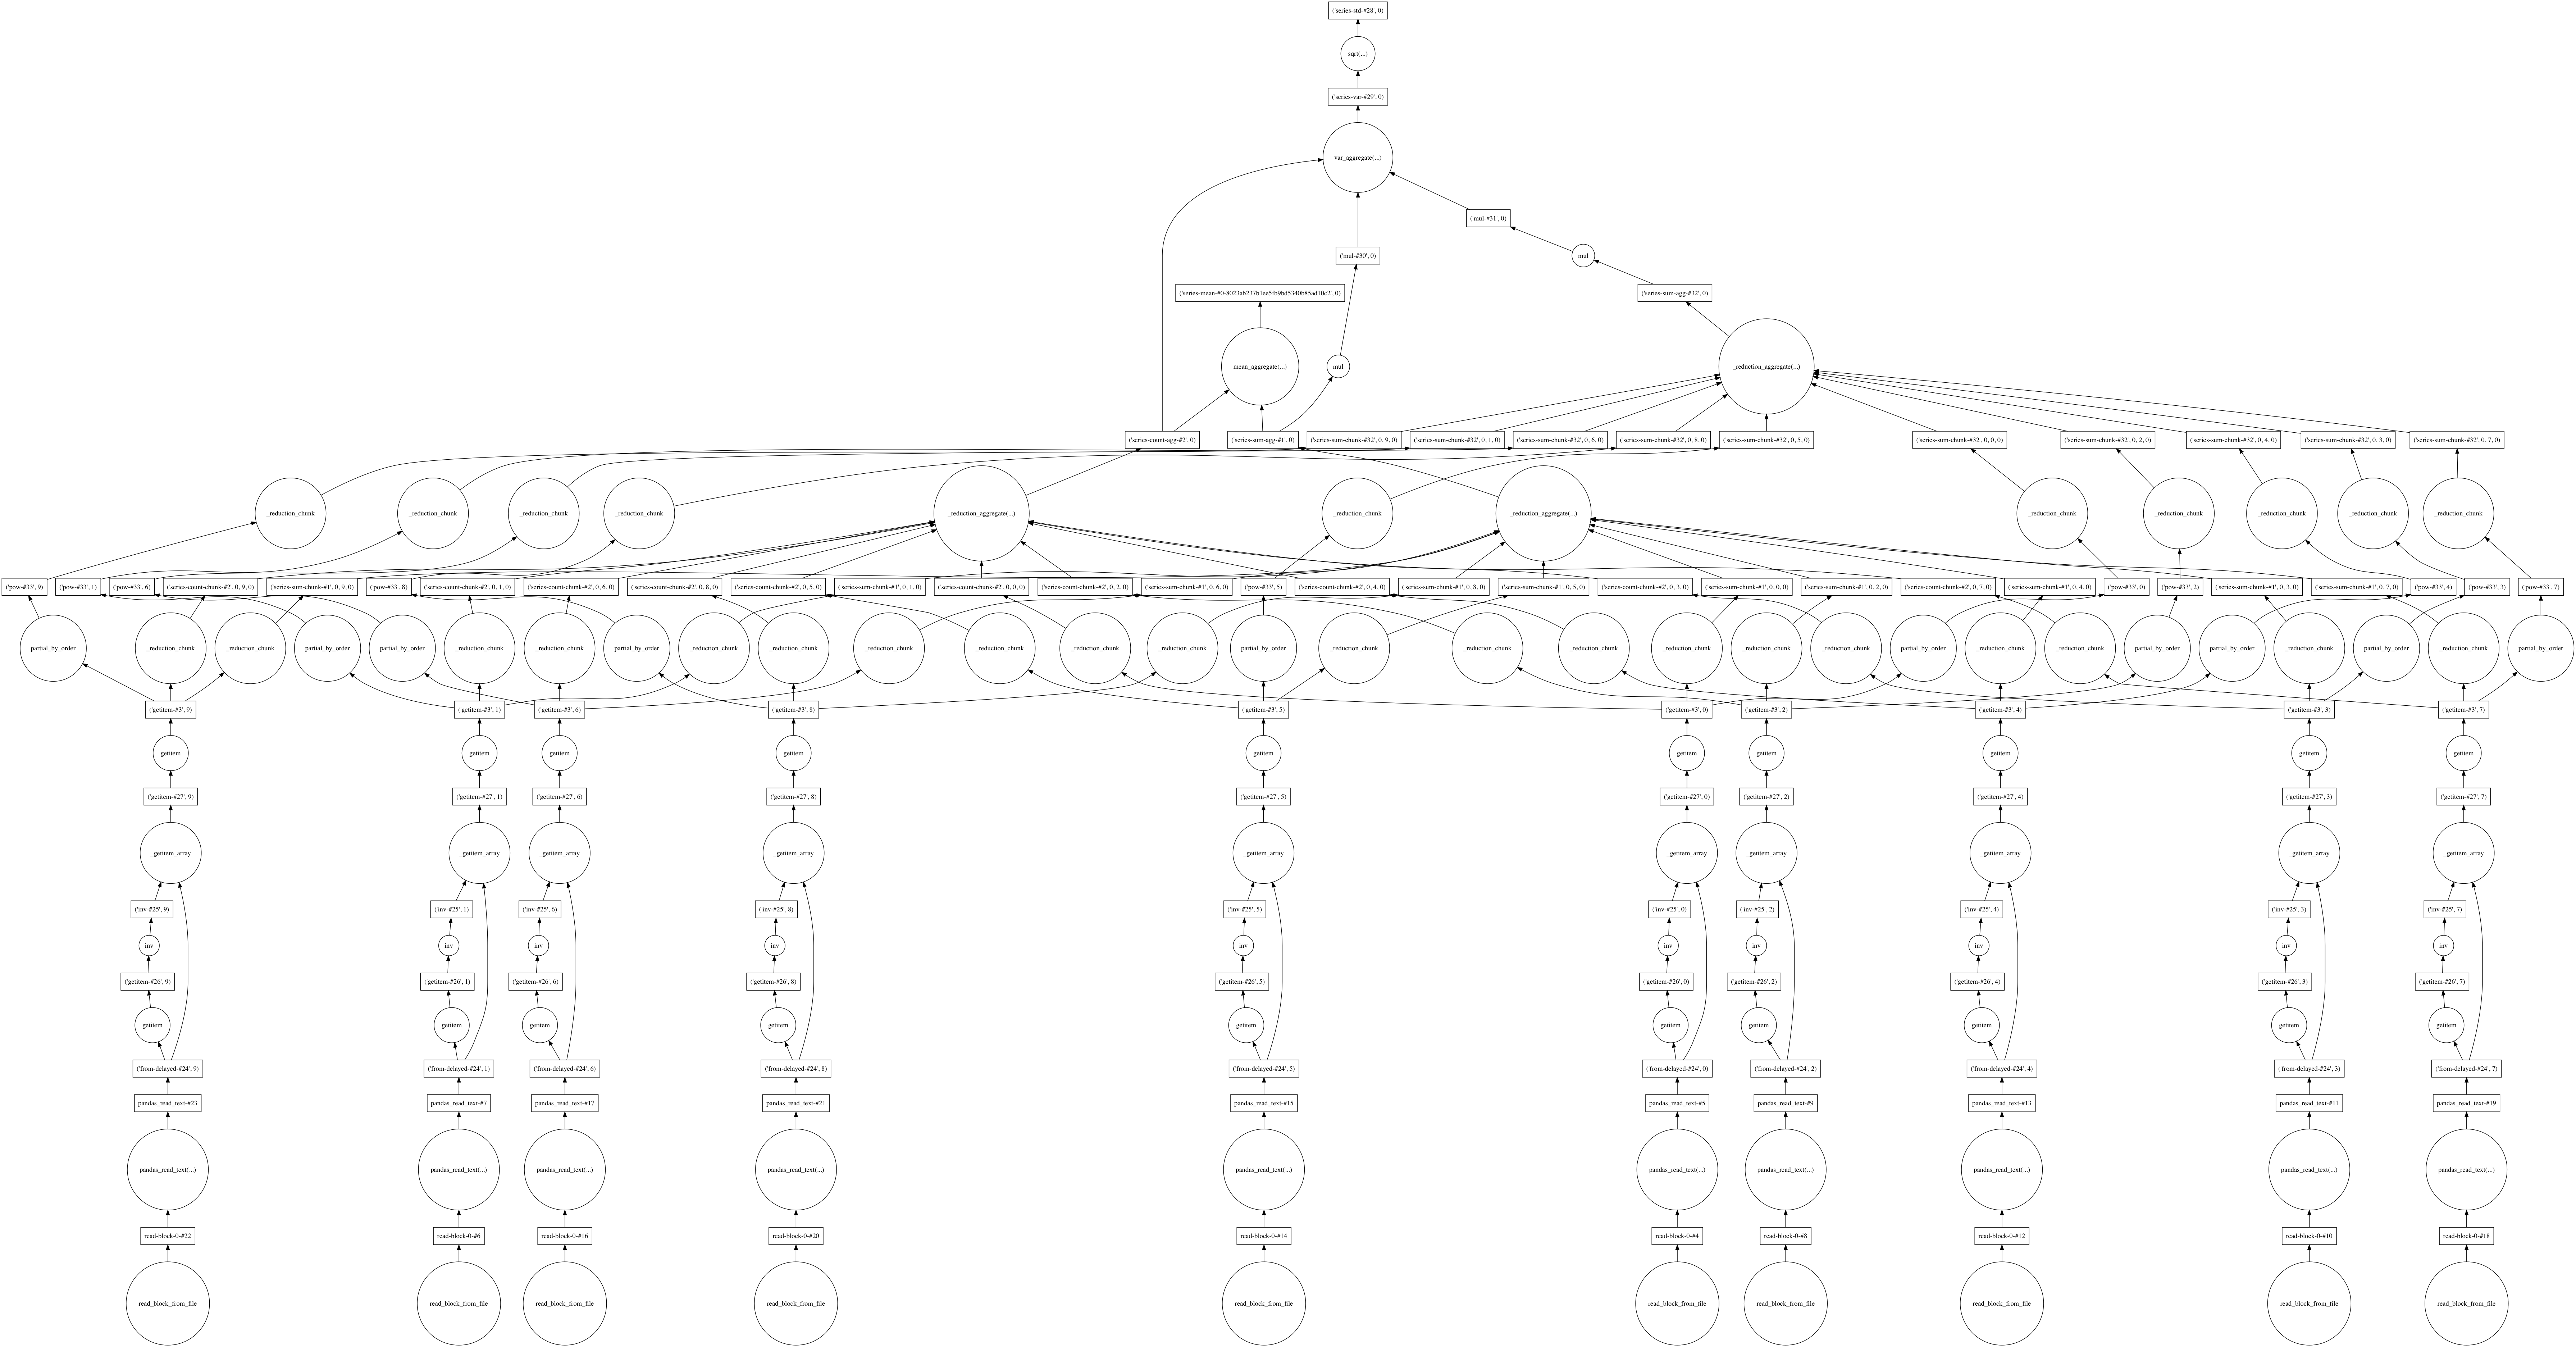

In [55]:
dask.visualize(mean_delay, std_delay)

## Converting `CRSDepTime` to a timestamp

In [58]:
# recreate the read_csv task with parsed dates
df = dd.read_csv(filenames,
                 parse_dates={'Date': [0, 1, 2]},
                 dtype={'TailNum': str,
                        'CRSElapsedTime': float,
                        'Cancelled': bool})

In [60]:
crs_dep_time = df.CRSDepTime.head(10)
crs_dep_time

0    1540
1    1540
2    1540
3    1540
4    1540
5    1540
6    1540
7    1540
8    1540
9    1540
Name: CRSDepTime, dtype: int64

# Pandas code

In [62]:
import pandas as pd

# Get the first 10 dates to complement our `crs_dep_time`
date = df.Date.head(10)

# Get hours as an integer, convert to a timedelta
hours = crs_dep_time // 100
hours_timedelta = pd.to_timedelta(hours, unit='h')

# Get minutes as an integer, convert to a timedelta
minutes = crs_dep_time % 100
minutes_timedelta = pd.to_timedelta(minutes, unit='m')

# Apply the timedeltas to offset the dates by the departure time
departure_timestamp = date + hours_timedelta + minutes_timedelta
departure_timestamp

0   1990-01-01 15:40:00
1   1990-01-02 15:40:00
2   1990-01-03 15:40:00
3   1990-01-04 15:40:00
4   1990-01-05 15:40:00
5   1990-01-06 15:40:00
6   1990-01-07 15:40:00
7   1990-01-08 15:40:00
8   1990-01-09 15:40:00
9   1990-01-10 15:40:00
dtype: datetime64[ns]

# Dask Dataframe

`dask.dataframe` provides a methods for implementing common patterns:

- [`map_partitions`](http://dask.pydata.org/en/latest/dataframe-api.html#dask.dataframe.DataFrame.map_partitions)
- [`map_overlap`](http://dask.pydata.org/en/latest/dataframe-api.html#dask.dataframe.DataFrame.map_overlap)
- [`reduction`](http://dask.pydata.org/en/latest/dataframe-api.html#dask.dataframe.DataFrame.reduction)

`map_partitions` applies Pandas method on each DataFrame partition

In [67]:

hours = df.CRSDepTime // 100
# hours_timedelta = pd.to_timedelta(hours, unit='h')
hours_timedelta = hours.map_partitions(pd.to_timedelta, unit='h')

minutes = df.CRSDepTime % 100
# minutes_timedelta = pd.to_timedelta(minutes, unit='m')
minutes_timedelta = minutes.map_partitions(pd.to_timedelta, unit='m')

departure_timestamp = df.Date + hours_timedelta + minutes_timedelta

In [70]:
departure_timestamp.head()

0   1990-01-01 15:40:00
1   1990-01-02 15:40:00
2   1990-01-03 15:40:00
3   1990-01-04 15:40:00
4   1990-01-05 15:40:00
dtype: datetime64[ns]

### Rewrite with single call to map_partitions

In [74]:
def compute_departure_timestamp(df):
    hours = df.CRSDepTime // 100
    hours_timedelta = pd.to_timedelta(hours, unit='h')

    minutes = df.CRSDepTime % 100
    minutes_timedelta = pd.to_timedelta(minutes, unit='m')

    return df.Date + hours_timedelta + minutes_timedelta

departure_timestamp = df.map_partitions(compute_departure_timestamp)
departure_timestamp.head()

0   1990-01-01 15:40:00
1   1990-01-02 15:40:00
2   1990-01-03 15:40:00
3   1990-01-04 15:40:00
4   1990-01-05 15:40:00
dtype: datetime64[ns]

# Dask Arrays

Dask array provides a parallel, larger-than-memory, n-dimensional array using blocked algorithms. Simply put: distributed Numpy.

*  **Parallel**: Uses all of the cores on your computer
*  **Larger-than-memory**:  Lets you work on datasets that are larger than your available memory by breaking up your array into many small pieces, operating on those pieces in an order that minimizes the memory footprint of your computation, and effectively streaming data from disk.
*  **Blocked Algorithms**:  Perform large computations by performing many smaller computations

**Related Documentation**

* http://dask.readthedocs.io/en/latest/array.html
* http://dask.readthedocs.io/en/latest/array-api.html

## Blocked Algorithms

A *blocked algorithm* executes on a large dataset by breaking it up into many small blocks.

In [93]:
%rm data/random.hdf5

In [96]:
# Create a big array with random data
import h5py

if not os.path.exists(os.path.join('data', 'random.hdf5')):
    with h5py.File(os.path.join('data', 'random.hdf5')) as f:
        dset = f.create_dataset('/x', shape=(1000000000,), dtype='f4')
        for i in range(0, 1000000000, 1000000):
            dset[i: i + 1000000] = np.random.exponential(size=1000000)
        # Load data with h5py
        f = h5py.File(os.path.join('data', 'random.hdf5'), mode='r')
        dset = f['/x']


### Compute sum of large array, one million numbers at a time

In [97]:
sums = []
for i in range(0, 1000000000, 1000000):
    chunk = dset[i: i + 1000000]  # pull out numpy array
    sums.append(chunk.sum())

total = sum(sums)
print(total)

1000032903.12


### Compute the mean using a blocked algorithm

In [100]:
sums = []
size = []
for i in range(0, 1000000000, 1000000):
    chunk = dset[i: i + 1000000]  # pull out numpy array
    sums.append(chunk.sum())
    size.append(len(chunk))
    
mean = sum(sums)/sum(size)
print(mean)

1.00003290312


# Dask Array

Dask.array is a NumPy-like library that does these kinds of tricks to operate on large datasets that don't fit into memory. 

`da.from_array` function:
    - data: Any object that supports NumPy slicing
    - chunks: Number of items in the chunk.


In [102]:
import dask.array as da
x = da.from_array(dset, chunks=(1000000,))

In [106]:
result = x.sum()
result

dask.array<sum-aggregate, shape=(), dtype=float32, chunksize=()>

In [108]:
result.compute()

1.0000329e+09

In [110]:
mean = x.mean()
mean.compute()

1.0000329

# Performance comparision

## Numpy

In [116]:
%%time 

x = np.random.normal(10, 0.1, size=(20000, 20000)) 
y = x.mean(axis=0)[::100] 
y

CPU times: user 12.2 s, sys: 840 ms, total: 13.1 s
Wall time: 13.1 s


In [117]:
%%time 

x = da.random.normal(10, 0.1, size=(20000, 20000),   # 400 million element array 
                              chunks=(1000, 1000))   # Cut into 1000x1000 sized chunks
y = x.mean(axis=0)[::100]                            # Perform NumPy-style operations
y.compute() 

CPU times: user 19 s, sys: 1.5 s, total: 20.5 s
Wall time: 3.37 s


# Matrix Multiplication
* create a sequence of matrices of increasing size.
* multiplies them.
* times the multiplications.

### NumPy version

In [118]:
import numpy as np
import time
 
array_sizes = [5] + list(range(10, 2001, 10))
 
times_elapsed_np = np.full((len(array_sizes), 1), 0.0)
 
num_loops = 10
the_loop = np.array(range(1, num_loops + 1))
chunk_size = 500
 
k = 0
for array_size in array_sizes:
    A = np.random.random((array_size, array_size))
    B = np.random.random((array_size, array_size))
    C = np.full((array_size, array_size), 0.0)
 
    start = time.process_time()
 
    for loop_counter in the_loop:
        C = A.dot(B)
 
    times_elapsed_np[k] = (time.process_time() - start)/num_loops*1000 # in msec
    k += 1

# Dask version

In [119]:
import dask
import dask.array as da
 
array_sizes = [5] + list(range(10, 2001, 10))
 
times_elapsed_da = np.full((len(array_sizes), 1), 0.0)
 
num_loops = 10
the_loop = np.array(range(1, num_loops + 1))
chunk_size = 500
 
k = 0
for array_size in array_sizes:
    A = da.random.random((array_size, array_size), chunks = chunk_size)
    B = da.random.random((array_size, array_size), chunks = chunk_size)
    C = da.full((array_size, array_size), 0.0, chunks = chunk_size)
 
    start = time.process_time()
 
    for loop_counter in the_loop:
 
        C = A.dot(B)
 
    times_elapsed_da[k] = (time.process_time() - start)/num_loops*1000 # in msec
    k += 1

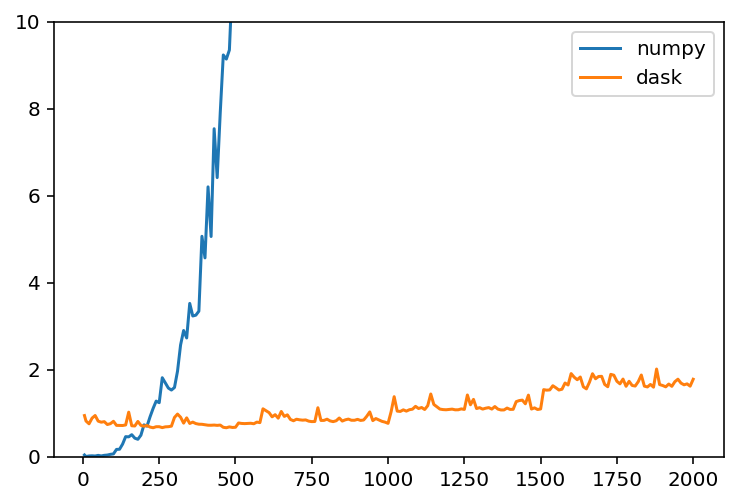

In [123]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt 

plt.plot(array_sizes, times_elapsed_np, label='numpy')
plt.plot(array_sizes, times_elapsed_da, label='dask')
plt.ylim((0,10))
plt.legend()

# Limitations

Dask.array does not implement the entire numpy interface. `dask.array` has the following failings:

1.  Dask does not implement all of ``np.linalg``. (BLAS/LAPACK)
2.  Dask.array does not support any operation where the resulting shape
    depends on the values of the array.
3.  Dask.array does not attempt operations like ``sort`` which are notoriously difficult to do in parallel.
4.  Many lesser used NumPy functions, like ``np.full_like`` have not been implemented.

# Dask Bag: Parallel Lists for semi-structured data

- Processing data that can be represented as a sequence of arbitrary inputs.
- Adding streaming computation with iterators/generator expressions.

**Related Documentation**

*  [Bag Documenation](http://dask.pydata.org/en/latest/bag.html)
*  [Bag API](http://dask.pydata.org/en/latest/bag-api.html)